# Trabalho 1 - Introdução a Teoria da Informação

**Alunos:** Itamar Filho, João Pedro Teixeira - 20180028453, Igor Simões

**Algoritmo Utilizado:** LZW


## Algoritmo base de Encode
Feito com base nas aulas sobre LZW. Versão simples usando as estruturas de dados Dicionário e Tupla padrões do Python.

```py
def encode(original_data: list, original_set: set, verbose: bool = True)->tuple:
        dictionary = {(value,): i for i, value in enumerate(original_set)}
        output = []
        current_arr = (original_data[0],)
        next_idx = len(original_set)

        for num in self.original_data[1:]:
            combined_arr = current_arr + (num,)
            if combined_arr in dictionary:
                current_arr = combined_arr
            else:
                output.append(dictionary[current_arr])
                dictionary[combined_arr] = next_idx
                next_idx += 1
                current_arr = (num,)

        if current_arr:
            output.append(dictionary[current_arr])
            combined_arr = current_arr + (-1,)
            dictionary[combined_arr] = next_idx

        return output, dictionary
```

## Algoritmo base de Decode
Feito com base nas aulas sobre LZW. Versão simples usando as estruturas de dados Dicionário e Tupla padrões do Python.
```py
def decode(encoded_data: list, data_set: set, verbose: bool = True)->list:
        reverse_dictionary = {i: (value,) for i, value in enumerate(sorted(data_set))}
        current_arr = encoded_data[0]
        output = [reverse_dictionary[current_arr]]

        for idx in encoded_data[1:]:
            if idx in reverse_dictionary:
                decoded_arr = reverse_dictionary[idx]
            else:
                decoded_arr = reverse_dictionary[current_arr] + (reverse_dictionary[current_arr][0],)

            output.append(decoded_arr)
            combined_arr = reverse_dictionary[current_arr] + (decoded_arr[0],)
            reverse_dictionary[len(reverse_dictionary)] = combined_arr
            current_arr = idx

        return [item for sublist in output for item in sublist]
```

## Arquivo Corpus16MB.txt

**Formato do arquivo:** Texto

**Tamanho:** 15.6 MB 

### Compressão usando alfabeto adaptável

```py
from compression import LZW

input_file_path = "test/data/corpus16MB.txt"
output_file_path = "test/data/encoded_corpus16MB"

lzw = LZW()
lzw.encode_from_file(input_file_path, verbose=True)
lzw.save_encoded_data(output_file_path)
```

In [8]:
%timeit !python encode_corpus_without_k.py

8.75 s ± 259 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Descompressão para alfabeto adaptável

```py
from compression import LZW
from compression.helpers import read_data

LZW().decode_from_file("test/data/encoded_corpus16MB.pickle",
                       "test/data/decoded_corpus16MB.txt")
decoded_data, _ = read_data("test/data/decoded_corpus16MB.txt", True)
original_data, _ = read_data("test/data/corpus16MB.txt", True)

print("Verificando se arquivo decodificado é igual ao original: ",
      decoded_data == original_data)

```

In [11]:
%timeit !python decode_corpus_without_k.py

Verificando se arquivo decodificado é igual ao original:  True
Verificando se arquivo decodificado é igual ao original:  True
Verificando se arquivo decodificado é igual ao original:  True
Verificando se arquivo decodificado é igual ao original:  True
Verificando se arquivo decodificado é igual ao original:  True
Verificando se arquivo decodificado é igual ao original:  True
Verificando se arquivo decodificado é igual ao original:  True
Verificando se arquivo decodificado é igual ao original:  True
6.89 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Compressão com dicionário variando por k



### Disco MP4 gráficos

In [1]:
# Initialize empty lists for total_time, RC1 and RC2
total_time_list = []
RC1_list = []
RC2_list = []

# Open the file for reading
with open('test/data/log_disco.mp4.txt', 'r') as f:
    # Read each line in the file
    for line in f:
        if "dict_k" in line:
            continue
        # Split the line into separate values using the tab delimiter
        dict_k, total_time, RC1, RC2 = line.strip().split('\t\t| ')
        # Append the values to their respective lists
        total_time_list.append(float(total_time))
        RC1_list.append(float(RC1))
        RC2_list.append(float(RC2))

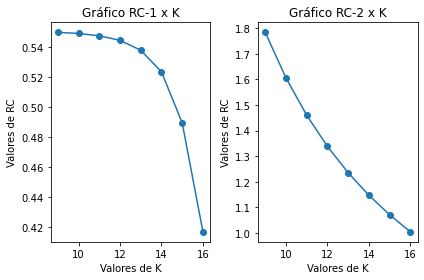

In [9]:
from matplotlib import pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range(9,17), RC1_list)
plt.scatter(range(9,17), RC1_list)
plt.title('Gráfico RC-1 x K')
plt.xlabel('Valores de K')
plt.ylabel('Valores de RC')
plt.subplot(1, 2, 2)
plt.plot(range(9,17), RC2_list)
plt.scatter(range(9,17), RC2_list)
plt.title('Gráfico RC-2 x K')
plt.xlabel('Valores de K')
plt.ylabel('Valores de RC')
plt.tight_layout()
plt.show()

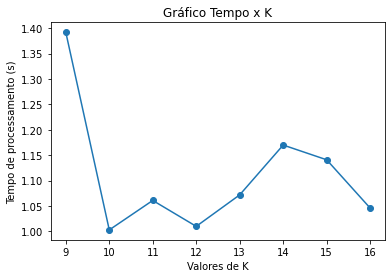

In [12]:
plt.plot(range(9,17), total_time_list)
plt.scatter(range(9,17), total_time_list)
plt.title('Gráfico Tempo x K')
plt.xlabel('Valores de K')
plt.ylabel('Tempo de processamento (s)')
plt.show()

### Corpus16 gráficos

In [14]:
# Initialize empty lists for total_time, RC1 and RC2
total_time_list = []
RC1_list = []
RC2_list = []

# Open the file for reading
with open('test/data/log_corpus16MB.txt.txt', 'r') as f:
    # Read each line in the file
    for line in f:
        if "dict_k" in line:
            continue
        # Split the line into separate values using the tab delimiter
        dict_k, total_time, RC1, RC2 = line.strip().split('\t\t| ')
        # Append the values to their respective lists
        total_time_list.append(float(total_time))
        RC1_list.append(float(RC1))
        RC2_list.append(float(RC2))

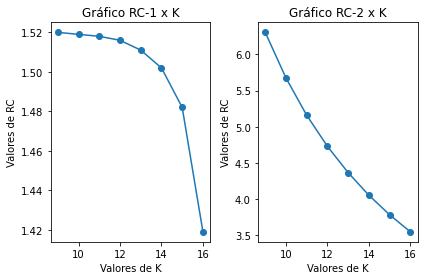

In [15]:
from matplotlib import pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range(9,17), RC1_list)
plt.scatter(range(9,17), RC1_list)
plt.title('Gráfico RC-1 x K')
plt.xlabel('Valores de K')
plt.ylabel('Valores de RC')
plt.subplot(1, 2, 2)
plt.plot(range(9,17), RC2_list)
plt.scatter(range(9,17), RC2_list)
plt.title('Gráfico RC-2 x K')
plt.xlabel('Valores de K')
plt.ylabel('Valores de RC')
plt.tight_layout()
plt.show()

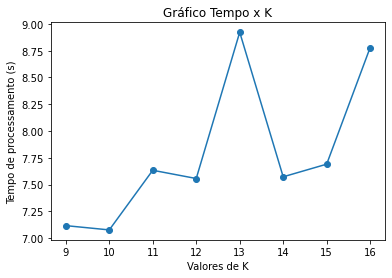

In [16]:
plt.plot(range(9,17), total_time_list)
plt.scatter(range(9,17), total_time_list)
plt.title('Gráfico Tempo x K')
plt.xlabel('Valores de K')
plt.ylabel('Tempo de processamento (s)')
plt.show()